In [2]:
import pandas as pd
import numpy as np

In [3]:
"""

# Langkah dalam proses pembuatan model

1. Import data
2. Pisahkan input dan output data
3. Pisahkan data training dan test dari input
4. Cek shape train data dan test data, bandingkan dengan data sebelum di split.
5. Lakukan proses imputer pada data numeric
6. Lakukan proses imputer pada data categorical
7. Standardize data training
8. Training Data
"""

'\n\n# Langkah dalam proses pembuatan model\n\n1. Import data\n2. Pisahkan input dan output data\n3. Pisahkan data training dan test dari input\n4. Cek shape train data dan test data, bandingkan dengan data sebelum di split.\n5. Lakukan proses imputer pada data numeric\n6. Lakukan proses imputer pada data categorical\n'

In [17]:
#1 : import data

def import_data(filename):
    """
    Parameters
      filename : str
        The location of csv file

    Returns:
      dataframe : pandas.Dataframe
    """

    dataframe = pd.read_csv(filename)
    print(f"Data Asli : {dataframe.shape} - (#observasi, #kolom)")

    dataframe = dataframe.drop_duplicates(keep='last')
    print(f"Data Setelah Di-Drop : {dataframe.shape} - (#observasi, #kolom)")

    return dataframe

In [18]:
dataframe = import_data("bank-data.csv")

Data Asli : (45211, 17) - (#observasi, #kolom)
Data Setelah Di-Drop : (45211, 17) - (#observasi, #kolom)


In [6]:
#2 : pisahkan input dan output data

def split_input_and_output(dataframe, output_column_name):
    output_data = dataframe[output_column_name]
    input_data = dataframe.drop(output_column_name, axis=1)
    return input_data, output_data

In [20]:
X, y = split_input_and_output(dataframe, "y")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,NaN,NaN,261.0,1.0,-1.0,0.0,unknown
1,NaN,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown
2,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown
3,NaN,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown
4,33.0,unknown,single,unknown,no,1.0,no,no,NaN,5.0,may,198.0,1.0,-1.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,NaN,17.0,nov,977.0,3.0,-1.0,0.0,unknown
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown
45208,72.0,NaN,married,NaN,no,5715.0,no,NaN,cellular,NaN,nov,1127.0,5.0,184.0,NaN,success
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,NaN,unknown


In [8]:
#3 : pisahkan data training dan test dari input

def split_training_and_test_data(input_data, test_size, seed):
    from sklearn.model_selection import train_test_split
    return train_test_split(input_data, y, test_size=test_size, random_state=seed)

In [9]:
X_train, X_test, y_train, y_test = split_training_and_test_data(X, 0.25, 13)

In [10]:
#4. Cek shape train data dan test data, bandingkan dengan data sebelum di split
print(f"X.shape : {X.shape}")
print(f"X_train.shape : {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

# Cek rasio X_test : X
print(f"X_test.shape[0] / X.shape[0]: {X_test.shape[0] / X.shape[0]}")

# Cek rasio X_train : X
print(f"X_train.shape[0] / X.shape[0]: {X_train.shape[0] / X.shape[0]}")

# Cek data kosong
print(f"X_train.isnull().sum() / X_train.shape[0] * 100: {X_train.isnull().sum() / X_train.shape[0] * 100}")

X.shape : (45211, 16)
X_train.shape : (33908, 16)
X_test.shape: (11303, 16)
y_train.shape: (33908,)
y_test.shape: (11303,)
X_test.shape[0] / X.shape[0]: 0.25000552962774547
X_train.shape[0] / X.shape[0]: 0.7499944703722545
X_train.isnull().sum() / X_train.shape[0] * 100: age          7.682553
job          7.897841
marital      7.794621
education    7.588180
default      7.821163
balance      7.443671
housing      7.809367
loan         7.788722
contact      8.148520
day          7.691400
month        7.682553
duration     7.998113
campaign     7.546892
pdays        7.806417
previous     7.714994
poutcome     7.720892
dtype: float64


age         2605
balance     2524
campaign    2559
day         2608
duration    2712
pdays       2647
previous    2616
dtype: int64


<Axes: xlabel='age', ylabel='Count'>

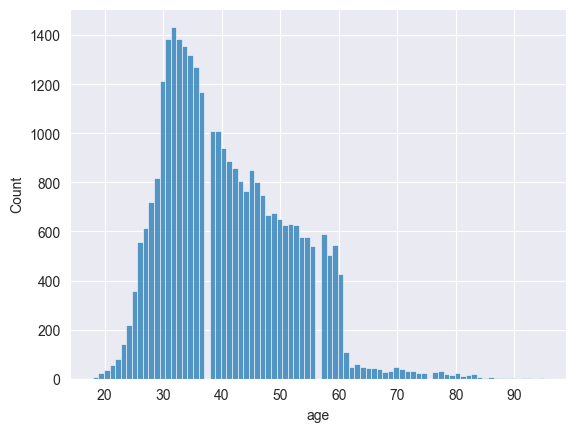

In [11]:
#5. Lakukan proses imputer pada data numeric

#5.1 : Lakukan proses analisis untuk menentukan strategy apa yang akan dipakai
#pada proses imputer (median/mean) dengan melakuakan exploratory data anlysis (E.D.A).

import seaborn as sns

numerical_columns = ["age", "balance", "campaign", "day", "duration", "pdays", "previous"]
X_train_numerical = X_train[numerical_columns]

print(X_train_numerical.isnull().sum())
sns.histplot(X_train_numerical["age"])

In [12]:
#5.2 : Buat imputer dari sklearn.impute.SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer.fit(X_train_numerical)
imputed_data = imputer.transform(X_train_numerical)

X_train_numerical_imputed = pd.DataFrame(imputed_data, columns=X_train_numerical.columns)
X_train_numerical_imputed.index = X_train_numerical.index
X_train_numerical_imputed.isnull().sum()

age         0
balance     0
campaign    0
day         0
duration    0
pdays       0
previous    0
dtype: int64

In [24]:
categorical_columns = ["poutcome", "loan", "marital", "month", "job", "housing", "default", "education", "contact"]
X_train_categorical = X_train[categorical_columns]
X_train_categorical_fillna = X_train_categorical.fillna(value="KOSONG")
X_train_categorical_fillna.isnull().sum()

13

In [13]:
X_train_numerical_imputed.isnull().any()

age         False
balance     False
campaign    False
day         False
duration    False
pdays       False
previous    False
dtype: bool

In [30]:
X_train_categorical_fillna.head()
X_train_categorical_fillna_ohe = pd.get_dummies(X_train_categorical_fillna)
ohe_columns = X_train_categorical_fillna_ohe.columns

X_train_concat = pd.concat([X_train_numerical_imputed, X_train_categorical_fillna_ohe], axis=1)

print(ohe_columns)

Index(['poutcome_KOSONG', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'loan_KOSONG', 'loan_no',
       'loan_yes', 'marital_KOSONG', 'marital_divorced', 'marital_married',
       'marital_single', 'month_KOSONG', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_KOSONG',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'housing_KOSONG', 'housing_no', 'housing_yes', 'default_KOSONG',
       'default_no', 'default_yes', 'education_KOSONG', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_KOSONG', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object'

In [32]:
X_train_concat.isnull().any()

age                    False
balance                False
campaign               False
day                    False
duration               False
pdays                  False
previous               False
poutcome_KOSONG        False
poutcome_failure       False
poutcome_other         False
poutcome_success       False
poutcome_unknown       False
loan_KOSONG            False
loan_no                False
loan_yes               False
marital_KOSONG         False
marital_divorced       False
marital_married        False
marital_single         False
month_KOSONG           False
month_apr              False
month_aug              False
month_dec              False
month_feb              False
month_jan              False
month_jul              False
month_jun              False
month_mar              False
month_may              False
month_nov              False
month_oct              False
month_sep              False
job_KOSONG             False
job_admin.             False
job_blue-colla

In [16]:
#7. Standardize data training
from sklearn.preprocessing import StandardScaler

def standardize_data(data):
    data_columns = data.columns
    data_index = data.index
    
    standardizer = StandardScaler()
    standardizer.fit(data)
    
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index
    
    return standardized_data, standardizer

In [33]:
X_train_clean, standardizer = standardize_data(X_train_concat)

In [34]:
X_train_clean.head()

,age,balance,campaign,day,duration,pdays,previous,poutcome_KOSONG,poutcome_failure,poutcome_other,...,default_yes,education_KOSONG,education_primary,education_secondary,education_tertiary,education_unknown,contact_KOSONG,contact_cellular,contact_telephone,contact_unknown
10937,-0.762510,-0.111515,-0.237170,0.148928,-0.346010,-0.395068,-0.288984,-0.289256,-0.333836,-0.197502,...,-0.128405,3.489755,-0.402231,-0.953707,-0.608611,-0.199429,-0.297849,-1.210948,-0.252085,1.668771
11047,0.893794,-0.239975,-0.237170,0.148928,-0.665033,-0.395068,-0.288984,-0.289256,-0.333836,-0.197502,...,-0.128405,-0.286553,-0.402231,-0.953707,1.643085,-0.199429,-0.297849,-1.210948,-0.252085,1.668771
30115,-1.347088,-0.365794,-0.237170,-1.477348,-0.583232,1.626999,2.959076,-0.289256,2.995487,-0.197502,...,-0.128405,-0.286553,-0.402231,1.048540,-0.608611,-0.199429,-0.297849,0.825799,-0.252085,-0.599243
28988,-0.470221,-0.310315,-0.574530,0.023829,-0.137418,1.895233,0.252360,-0.289256,2.995487,-0.197502,...,-0.128405,-0.286553,2.486133,-0.953707,-0.608611,-0.199429,-0.297849,0.825799,-0.252085,-0.599243
24026,1.575801,-0.417641,0.437549,1.650105,-0.746834,-0.395068,-0.288984,-0.289256,-0.333836,-0.197502,...,-0.128405,-0.286553,-0.402231,-0.953707,1.643085,-0.199429,-0.297849,0.825799,-0.252085,-0.599243


In [35]:
y_train.value_counts(normalize=True)

y
no     0.884039
yes    0.115961
Name: proportion, dtype: float64

In [36]:
#8. Training Data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train_clean, y_train)

KNeighborsClassifier()

In [38]:
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train_clean, y_train)

LogisticRegression()

In [39]:
random_forest = RandomForestClassifier(random_state=123)
random_forest.fit(X_train_clean, y_train)

RandomForestClassifier()

In [41]:
predicted_knn = pd.DataFrame(knn.predict(X_train_clean))
predicted_logreg = pd.DataFrame(logreg.predict(X_train_clean))
predicted_random_forest = pd.DataFrame(random_forest.predict(X_train_clean))

In [42]:
#9. Cek performa model
benchmark = y_train.value_counts(normalize=True)
benchmark

y
no     0.884039
yes    0.115961
Name: proportion, dtype: float64

In [43]:
knn.score(X_train_clean, y_train)

0.9111714049781763

In [44]:
logreg.score(X_train_clean, y_train)

0.9017635956116551

In [45]:
random_forest.score(X_train_clean, y_train)

1.0

In [ ]:
def extract_test(data, numerical_columns, categorical_columns, ohe_columns, imputer_numerical, standardizer):
    numerical_data = data[numerical_columns]
    categorical_data = data[categorical_columns]
    
    numerical_data = pd.DataFrame(imputer_numerical.transform(numerical_data))
    numerical_data.columns = numerical_columns
    numerical_data.index = data.index
    
    categorical_data = categorical_data.fillna(value="KOSONG")
    categorical_data.index = data.index
    categorical_data = pd.get_dummies(categorical_data)
    categorical_data.reindex(index=categorical_data.index, ohe_columns=ohe_columns)
    
    concat_data = pd.concat([numerical_columns, categorical_data], axis=1)
    cleaned_data = pd.DataFrame(standardizer.transform(concat_data))
    
    return cleaned_data

In [ ]:
def test_prediction(X_test, y_test, classifier, compute_score):
    if compute_score:
        score = classifier.score(X_test, y_test)
        print(f"Accuracy : {score:.4f}")
        
    